In [59]:
#Create the Decision Tree classifier and visualize it graphically.
#The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
df = pd.read_csv(r"C:\Users\srika\Downloads\Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df = df.drop('Id', axis = 1) #Drop unnecessary columns
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.shape

(150, 6)

In [16]:
df.size

900

In [19]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
# count of the column species
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='count', ylabel='Species'>

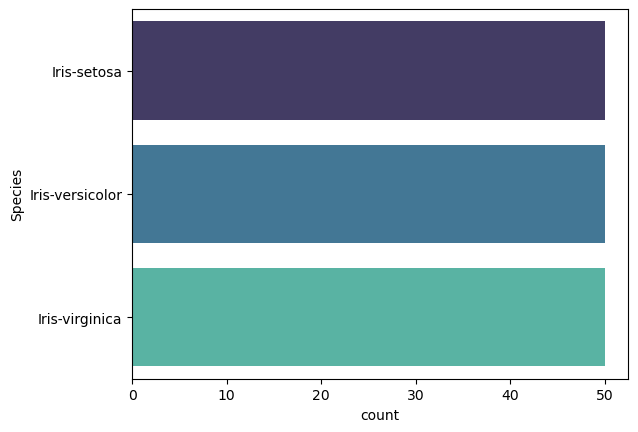

In [21]:
sns.countplot(y= df.Species, palette = "mako")

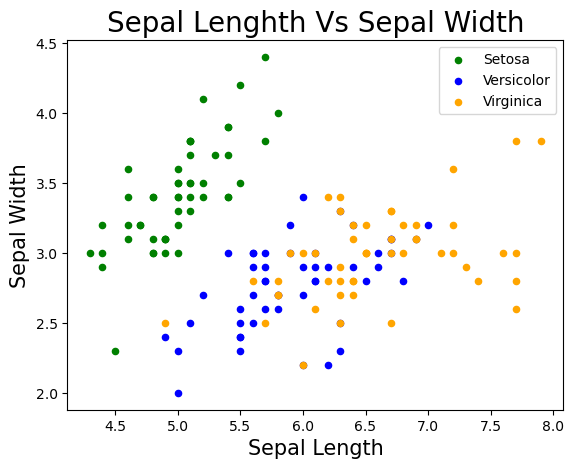

In [22]:
#Sepal length VS Sepal Width
fig = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'green', 
                                               label= 'Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'SepalLengthCm', y = 'SepalWidthCm',color = 'blue',
                                             label= 'Versicolor',ax = fig)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'orange', 
                                            label= 'Virginica',ax = fig)
fig.set_xlabel("Sepal Length", fontsize =15)
fig.set_ylabel("Sepal Width", fontsize = 15)
fig.set_title("Sepal Lenghth Vs Sepal Width", fontsize= 20)
plt.show()

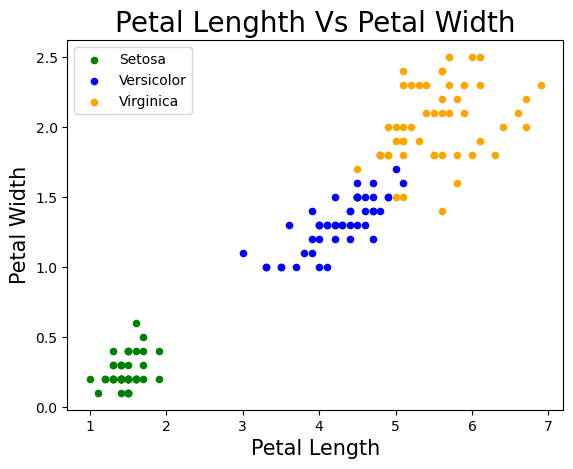

In [23]:
#Petal length VS Petal Width
fig = df[df.Species == 'Iris-setosa'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'green', label= 'Setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x= 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue',
                                                     label= 'Versicolor',ax = fig)
df[df.Species == 'Iris-virginica'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'orange', 
                                                    label= 'Virginica',ax = fig)
fig.set_xlabel("Petal Length", fontsize = 15)
fig.set_ylabel("Petal Width", fontsize = 15)
fig.set_title("Petal Lenghth Vs Petal Width", fontsize = 20)
plt.show()

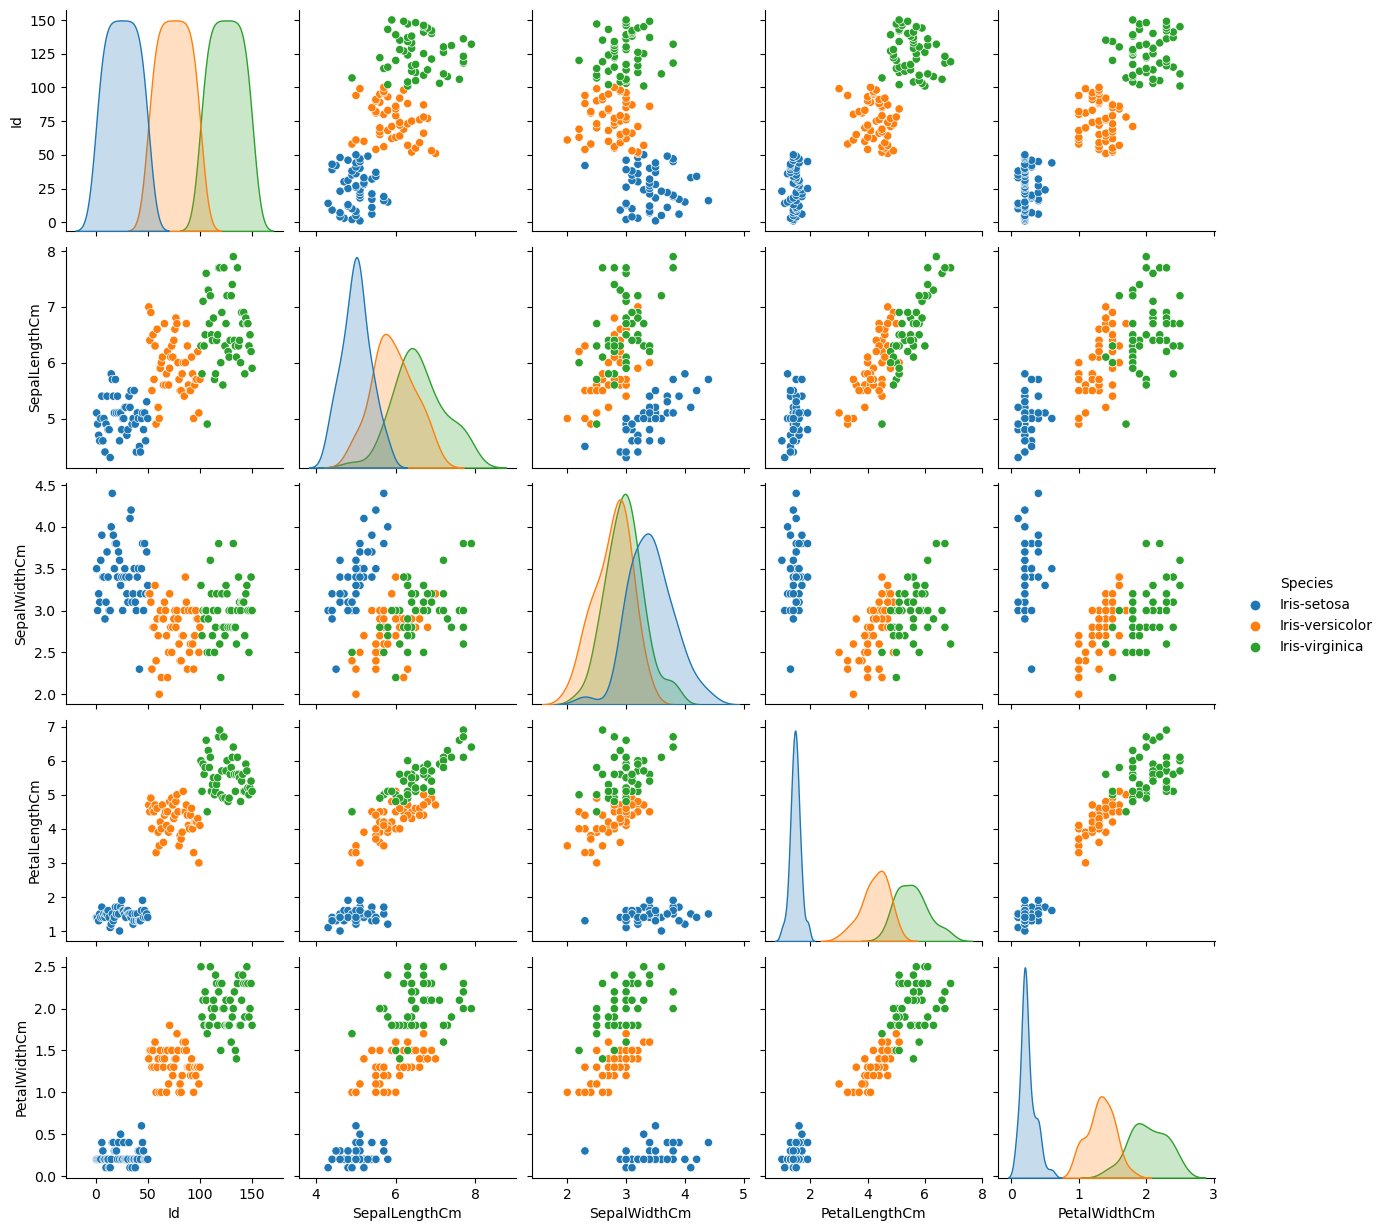

In [27]:
# pairplot for better visualization
sns.pairplot(df, hue = 'Species')

In [33]:
# checking the correlation matrix of the categorical variables
corr_matrixdf.corr()
print(corr_matrix)

C:\Users\srika\AppData\Local\Temp\ipykernel_3508\2327535979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


C:\Users\srika\AppData\Local\Temp\ipykernel_3508\615092018.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'PuBu')


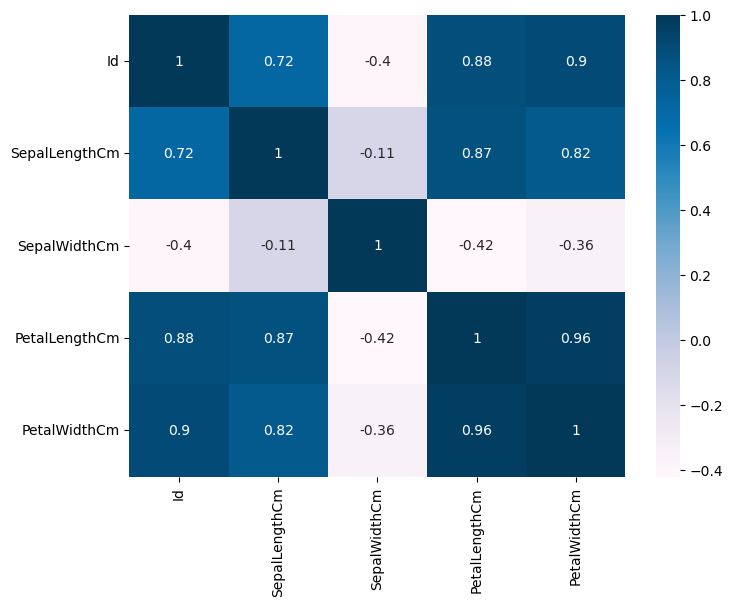

In [34]:
# plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True, cmap = 'PuBu')
plt.show()


In [35]:
# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [36]:
LE = LabelEncoder()

In [37]:
df.iloc[:,-1] =  LE.fit_transform(df.iloc[:,-1])
df

C:\Users\srika\AppData\Local\Temp\ipykernel_3508\542275995.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1] =  LE.fit_transform(df.iloc[:,-1])


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [38]:
x = df.iloc[:,:-1]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [40]:
# to split the data in test and train
from sklearn.model_selection import train_test_split
# Define X (features) and y (target)
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Display the first few rows of the training feature matrix
print(X_train.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
125  126            7.2           3.2            6.0           1.8
98    99            5.1           2.5            3.0           1.1
73    74            6.1           2.8            4.7           1.2
144  145            6.7           3.3            5.7           2.5
21    22            5.1           3.7            1.5           0.4


In [41]:
#shape of X_train and X_test
print(X_train.shape, X_test.shape)

(120, 5) (30, 5)


In [42]:
#shape of y_train and y_test
print(y_train.shape, y_test.shape)

(120,) (30,)


In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [46]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [47]:
final_pred = pd.DataFrame( { 'Actual':  y_test,
                            'Predicted': dt.predict( X_test) } )

In [48]:
final_pred.sample(n = 10)

,Actual,Predicted
3,0,0
8,0,0
18,1,1
0,1,1
19,1,1
22,0,0
7,0,0
5,2,2
14,1,1
21,1,1


In [49]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [50]:
metrics.accuracy_score( final_pred.Actual, final_pred.Predicted )

0.9666666666666667

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



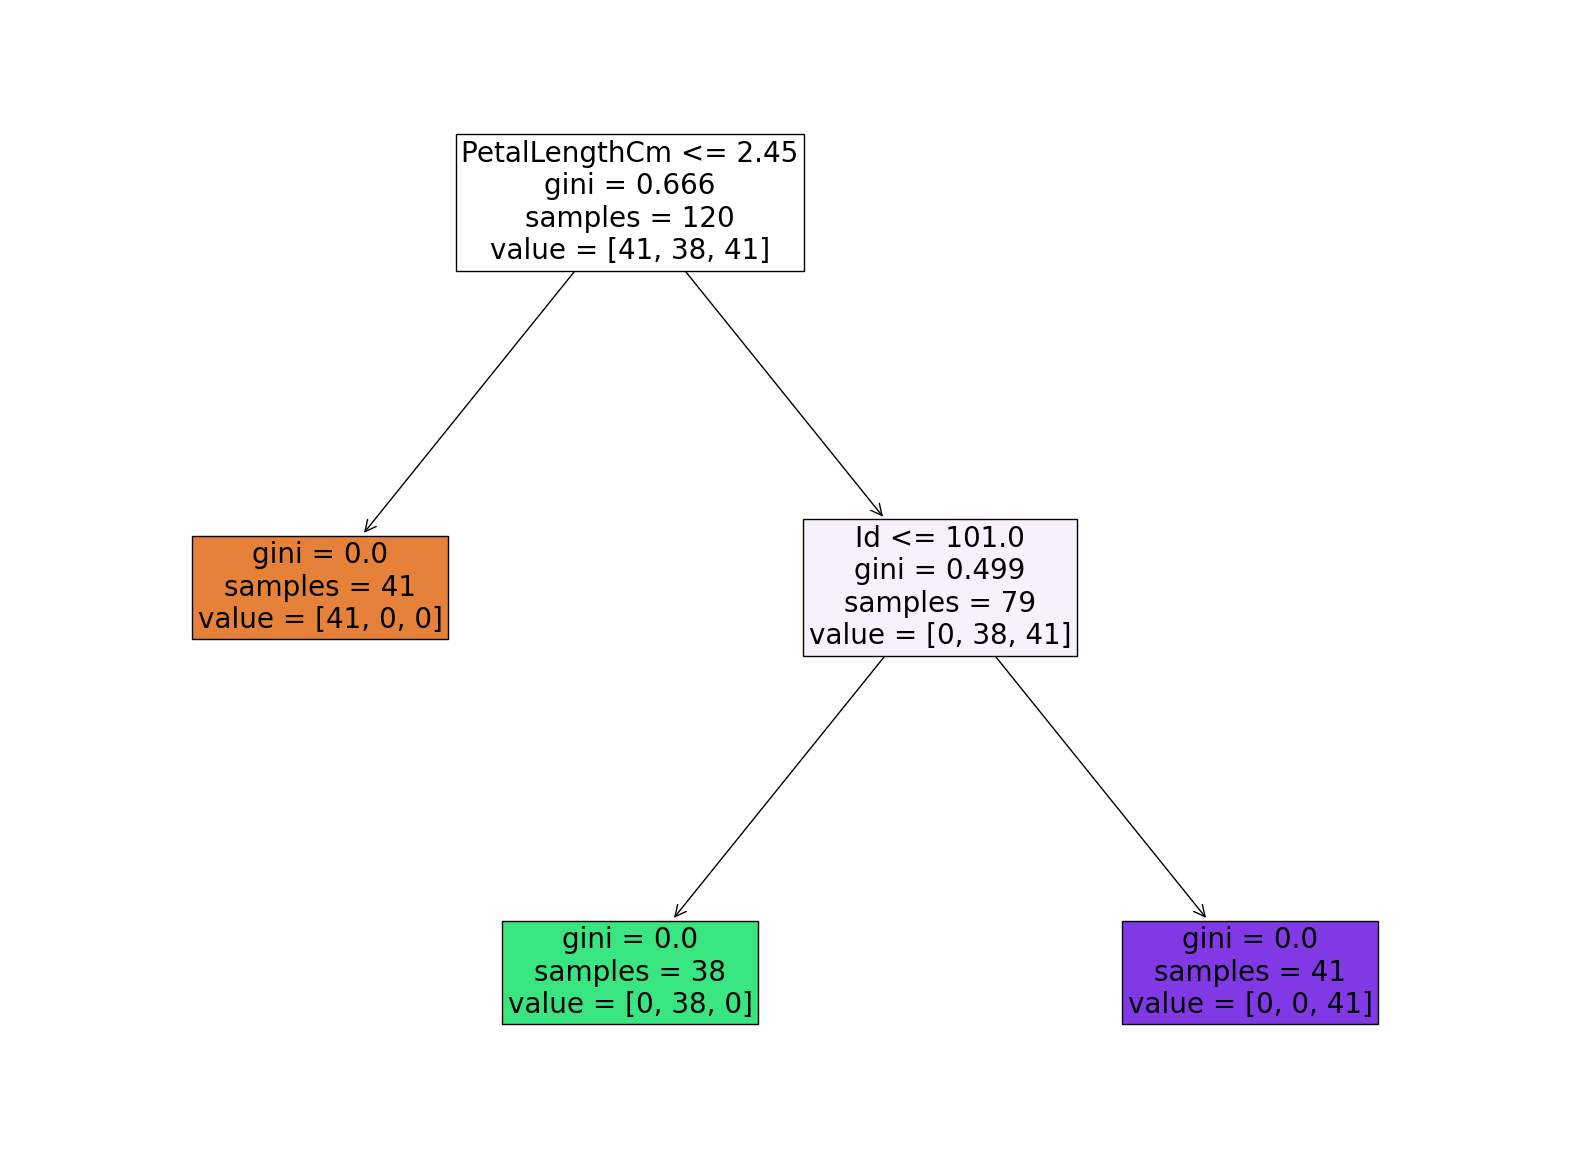

In [58]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize = (20,15))
tviz = tree.plot_tree(dt, feature_names = x.columns, filled = True,fontsize = 20)

The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.




THANK YOU